## Содержание проекта
1 [Загрузка данных](#1)

- [Целевой признак. Предварительный анализ.](#1.1)
- [Выделение целевого признака](#1.2)
- [Обучение базовой модели](#1.3)

2 [Умножение матриц](#2)
- [Алгоритм обучения линейной регресси](#2.1)
- [Признаки умножаем на обратимую матрицу. Изменится ли качество линейной регрессии?](#2.2)

3 [Алгоритм преобразования](#3)

4 [Проверка алгоритма](#4)
    
  [Вывод](#5)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

## 1. Загрузка данных<a id="1"></a>

In [2]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [3]:
data = pd.read_csv('./insurance.csv') 

In [4]:
print('=='*5, 'Info' , '=='*5)
display(data.info())
print('=='*5, 'missing data', '=='*5)
display(missing_data(data))
print('=='*5, 'duplicated', '=='*5)
display(data.duplicated().sum())
print('=='*5, 'describe', '=='*5)
display(data.describe().T)
print('=='*5, 'inspection', '=='*5)
display(data.head(10).T)

========== Info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


None

========== missing data ==========


,Total,Percent
Страховые выплаты,0,0.0
Члены семьи,0,0.0
Зарплата,0,0.0
Возраст,0,0.0
Пол,0,0.0


========== duplicated ==========


153

========== describe ==========


,count,mean,std,min,25%,50%,75%,max
Пол,5000.0,0.4990,0.500049,0.0,0.0,0.0,1.0,1.0
Возраст,5000.0,30.9528,8.440807,18.0,24.0,30.0,37.0,65.0
Зарплата,5000.0,39916.3600,9900.083569,5300.0,33300.0,40200.0,46600.0,79000.0
Члены семьи,5000.0,1.1942,1.091387,0.0,0.0,1.0,2.0,6.0
Страховые выплаты,5000.0,0.1480,0.463183,0.0,0.0,0.0,0.0,5.0


========== inspection ==========


,0,1,2,3,4,5,6,7,8,9
Пол,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
Возраст,41.0,46.0,29.0,21.0,28.0,43.0,39.0,25.0,36.0,32.0
Зарплата,49600.0,38000.0,21000.0,41700.0,26100.0,41000.0,39700.0,38600.0,49700.0,51700.0
Члены семьи,1.0,1.0,0.0,2.0,0.0,2.0,2.0,4.0,1.0,1.0
Страховые выплаты,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


В данных имеются дубликаты, но их обработка не требуетя условием задачи.

### Целевой признак. Предварительный анализ.<a id="1.1"></a>

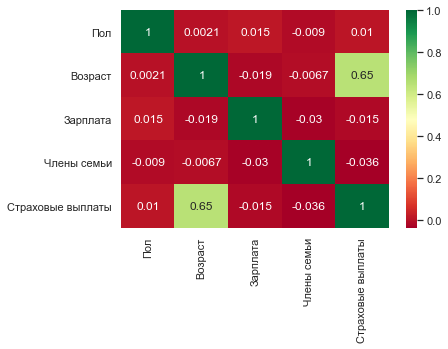

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\seaborn\distributions.py:1657: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


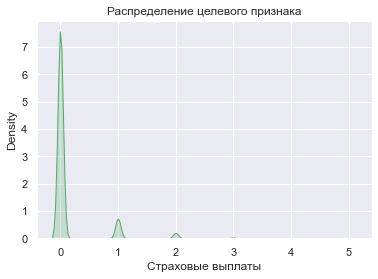

In [5]:
sns.heatmap(data.corr(method='pearson'),cmap='RdYlGn', annot=True)
plt.show()
sns.kdeplot(data['Страховые выплаты'], shade=True, color='g', bw=.1).set_title('Распределение целевого признака')
plt.show()

Имеется зависимость только от признака `'Возраст'`.

### Выделение целевого признака<a id="1.2"></a>

In [6]:
features = data.drop(['Страховые выплаты'], axis=1)
target = data['Страховые выплаты']

### Обучение базовой модели<a id="1.3"></a>

In [7]:
def encrypt(A, data):
    return data.dot(A)#A_inv.dot(data)

def decrypt(A_inv, data):
    return data.dot(A_inv)

def score_plot(data, target, predict):
    display('r2_score:', r2_score(target, predict))
    x = data['Возраст']
    plt.xlabel('Возраст')
    plt.ylabel('Выплаты')
    plt.scatter(x, target, alpha=0.7, marker = 'x')
    plt.scatter(x, predict, color='red', linewidth=1, alpha=0.3, marker = '.');
    plt.title('Прогноз модели')
    

Обучим базовую модель линейной регрессии из пакета `sklearn.linear_model` для дальнейшего сравнения с ней результатов.

'r2_score:'

0.42494550286668

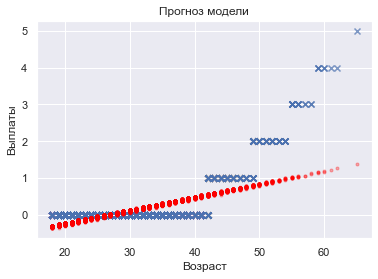

In [8]:
base_model = LinearRegression()
base_model.fit(features, target)
base_predictions = base_model.predict(features)

score_plot(data, target, base_predictions)

## 2. Умножение матриц<a id="2"></a>

### Алгоритм обучения линейной регресси<a id="2.1"></a>

Разберём алгоритм обучения. Но прежде сформулируем его задачу.
Нашей метрикой качества будет $MSE$: её наименьшее значение модель должна получить на тестовых данных. Задачу обучения сформулируем такую: найти параметры модели, при которых значение функции потерь (англ. loss function) на обучающей выборке минимально. Как метрики качества, она принимает на вход правильные ответы и предсказания. А возвращает число, которое называют «потерями» (их-то и нужно минимизировать).

Обучающую выборку представим как матрицу $X$, в которой строки соответствуют объектам, а столбцы — признакам (Матрица признаков). Параметры линейной регрессии обозначим $w$ и $w_0$ (вектор весов линейной регрессии, нулевой элемент равен сдвигу). Чтобы получить вектор предсказаний $a$, умножим матрицу $X$ на вектор $w$ и прибавим величину сдвига $w_0$.
Формула выглядит так: 

$$
a = Xw + w_0
$$

Для сокращения записи изменим обозначения. В матрицу $X$ добавим столбец, состоящий только из единиц (он идёт нулевым); а параметр $w_0$ — к вектору $w$. Затем умножим матрицу $X$ на вектор $w$. Сдвиг умножится на вектор из единиц (нулевой столбец). Получим такой вектор предсказаний $a$:

$$
a = Xw
$$

Введём новое обозначение $y$ — вектор значений целевого признака для обучающей выборки.
Запишем формулой задачу обучения линейной регрессии для функции потерь $MSE$:

$$
w = \arg\min_w MSE(Xw, y)
$$

Функция $argmin()$ находит минимум и возвращает, при каком аргументе он был достигнут. Минимальное значение $MSE$ получается, когда веса равны этой величине:

$$
w = (X^T X)^{-1} X^T y
$$

- Транспонированная матрица признаков умножается на себя;
- Вычисляется обратная к результату матрица;
- Обратная умножается на транспонированную матрицу признаков;
- Результат умножается на вектор значений целевого признака.

### Признаки умножаем на обратимую матрицу. Изменится ли качество линейной регрессии?<a id="2.2"></a>
**Обоснование**

Для того, чтобы защитить данные клиентов и по ним было сложно восстановить персональную информацию предлагается матрицу признаков $X$ умножить на обратимую матрицу $A$. Предполагается, что качество линейной регрессии не изменится.

Умножаем признаки на случайную обратимую матрицу:

$$
X' = XA
$$

Преобразуем получившийся вектор весов линейной регрессии:

$$
w' = (X^T X)^{-1} X^T y = ((XA)^T X A)^{-1} (XA)^T y = 
(A^T X^T X A)^{-1} A^T X^T y =
A^{-1}(X^T X)^{-1} (A^T)^{-1} A^T X^T y = 
A^{-1}(X^T X)^{-1} E X^T y =
A^{-1} w
$$

, где $(X^T X)^{-1} X^T y$ это $w$, а $(A^T)^{-1} A^T$ это еденичная матрица $E$, или $1$.

Подставим получичившийся вес $w'$ и признаки $X'$ в вектор предсказаний $a'$:

$$
a' = X'w' = XA A^{-1}w = XEw = Xw = a
$$

, где $A A^{-1}$ это еденичная матрица $E$, или $1$

Таким образом:
- преобразованный умножением  признаков $X$ на матрицу $A$ вектор весов линейной регрессии $w'$ равен произведению обратной матрицы $A^{-1}$ на веса регрессии $w$. Это позволяет скрыть данные но не потерять зависимость.
- Вектор предсказаний $a'$ равен $a$, что означает, что преобразованная модель будет предсказывать на модифицированных признаках также как и на необработанных данных.

**Ответ:** качество линейной регрессии не изменится

## 3. Алгоритм преобразования<a id="3"></a>

Генерируем квадратную матрицу $A$ в размер выборки: $4*4$

In [9]:
state = np.random.RandomState(12345)
A = state.normal(size=(4,4))

Инвертируем матрицу и проверяем обратимость созданием единичной матрицы

In [10]:
A_inv = np.linalg.inv(A)
A_inv @ A

array([[ 1.00000000e+00,  7.36533301e-18, -2.29475815e-16,
         1.05579946e-16],
       [-2.21450819e-16,  1.00000000e+00,  2.13434456e-16,
        -1.15494236e-16],
       [-5.54095197e-18,  4.61724041e-17,  1.00000000e+00,
        -1.20687396e-17],
       [-7.07512602e-17, -1.06941564e-16,  1.26541065e-16,
         1.00000000e+00]])

Признаки `features` Умножаем на матрицу $A$, проверяем, что данные недоступны для понимания.

In [11]:
features_multipli_A = features.values.dot(A)
pd.DataFrame(features_multipli_A, columns = features.columns).head()

,Пол,Возраст,Зарплата,Члены семьи
0,38224.186641,61881.000420,49961.234837,-64280.684721
1,29313.558467,47428.845564,38278.822267,-49242.555394
2,16206.481556,26215.538233,21153.670838,-27212.472653
3,32110.072445,52006.047856,42004.453110,-54044.730722
4,20126.326163,32571.440926,26289.724215,-33824.037786


Подаем зашифрованные данные в модель линейной регрессии. Обучаем модель.

In [12]:
class MainLinearRegression:
    def fit(self, features, target):
        X = np.concatenate((np.ones((features.shape[0], 1)), features), axis=1)
        y = target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, features):
        return features.dot(self.w) + self.w0
    
model = MainLinearRegression()
model.fit(features_multipli_A, target)

Получаем предсказания, сверяем распределения с базовой моделью. 

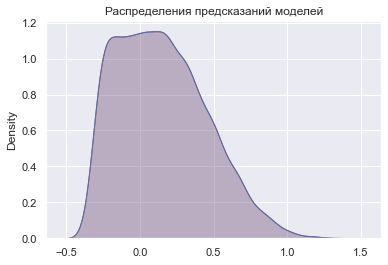

In [13]:
predictions = model.predict(features_multipli_A)

sns.kdeplot(predictions, shade=True, color='r',label = 'Зашифрованная модель')
sns.kdeplot(base_predictions, shade=True, color='b',label = 'Базовая модель').set_title('Распределения предсказаний моделей')
plt.show()

Можно также расшифровать признаки $X'$, умножив на обратную матрицу $A^{-1}$

In [14]:
decrypt_features = decrypt(A_inv, features_multipli_A)
pd.DataFrame(decrypt_features, columns = features.columns).round(0).head(5)


,Пол,Возраст,Зарплата,Члены семьи
0,1.0,41.0,49600.0,1.0
1,-0.0,46.0,38000.0,1.0
2,0.0,29.0,21000.0,-0.0
3,-0.0,21.0,41700.0,2.0
4,1.0,28.0,26100.0,-0.0


**Алгоритм**

- Генерируем квадратную матрицу $A$ в размер выборки признаков $X$(количество столбцов)
- Инвертируем матрицу в $A^{-1}$ и проверяем обратимость создав единичную матрицу $E$, умножением $A * A^{-1}$
- Признаки $X$ (`features`) умножаем на матрицу $A$, получаем $X'$
- Обучаем модель с признаками $X'$ и целевым признаком $y$.
- Получаем предсказани $a$

## 4. Проверка алгоритма<a id="4"></a>

 Проверим, что качество линейной регрессии из `sklearn` не отличается до и после преобразования

In [15]:
encrypt_features = encrypt(A, features.values)

'r2_score:'

0.42494550286667954

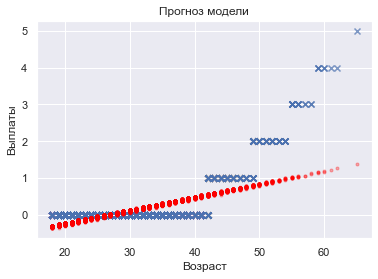

In [16]:
encrypt_model = LinearRegression().fit(encrypt_features, target)
encrypt_predictions = encrypt_model.predict(encrypt_features)

score_plot(data, target, encrypt_predictions)

In [17]:
print('разница r2_score', r2_score(target, base_predictions) - r2_score(target, encrypt_predictions))

разница r2_score 4.440892098500626e-16


Разница r2_score близка к нулю. Точнось модели не изменилась.


## Вывод<a id="5"></a>
Предложеный алгоритм преобразования данных позволяет усложнить получение и скрыть персонифицированную информацию, не теряя точности модели. 